In [1]:
import networkx as nx
import pdb; #pdb.set_trace()
G = nx.DiGraph()

In [2]:
G.add_node('Alice')
G.add_node('Bob')
G.add_node('Chuck')

In [3]:
list(G.nodes())

['Alice', 'Bob', 'Chuck']

In [4]:
G.add_edge('Alice', 'Bob')
G.add_edge('Alice', 'Chuck')
G.add_edge('Bob', 'Alice')
G.add_edge('Bob', 'Chuck')

In [5]:
list(G.edges())

[('Alice', 'Bob'), ('Alice', 'Chuck'), ('Bob', 'Alice'), ('Bob', 'Chuck')]

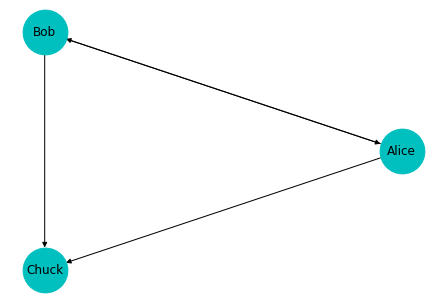

In [6]:
nx.draw_circular(G, node_color="c", node_size=2000, with_labels=True)

In [7]:
positions = dict(Albany=(-74, 43),
                Boston=(-71, 42),
                NYC=(-74, 41),
                Philly=(-75, 40))

In [8]:
G = nx.Graph()
G.add_nodes_from(positions)

In [9]:
drive_times = {('Albany', 'Boston'): 3,
              ('Albany', 'NYC'): 4,
              ('Boston', 'NYC'): 4,
              ('NYC', 'Philly'): 2}

In [10]:
G.add_edges_from(drive_times)

{('Albany', 'Boston'): Text(-72.5, 42.5, '3'),
 ('Albany', 'NYC'): Text(-74.0, 42.0, '4'),
 ('Boston', 'NYC'): Text(-72.5, 41.5, '4'),
 ('NYC', 'Philly'): Text(-74.5, 40.5, '2')}

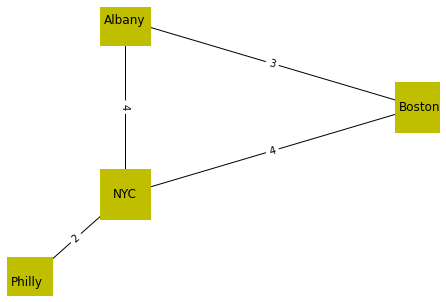

In [11]:
nx.draw(G, positions,
       node_color="y",
       node_shape='s',
       node_size=2500,
       with_labels=True)
nx.draw_networkx_edge_labels(G, positions, edge_labels=drive_times)

In [12]:
def all_pairs(nodes):
    #import pdb; pdb.set_trace()
    #print(nodes)
    for i, u in enumerate(nodes):
        #print(i,u)
        for j, v in enumerate(nodes):
            if i>j:
                #print(u,v)
                yield u, v
    #print(nodes)
    #print(u,v)
    #pdb.set_trace()

In [13]:
def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

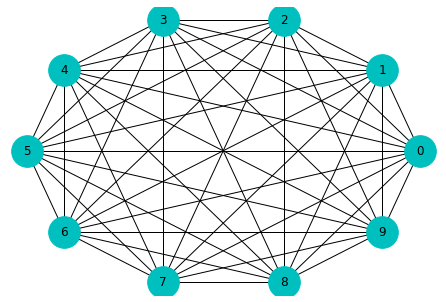

In [14]:
complete = make_complete_graph(10)
nx.draw_circular(complete,
                node_color='c',
                node_size=1000,
                with_labels=True)

In [15]:
complete.neighbors(0)

In [16]:
def reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen

In [17]:
reachable_nodes(complete, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [18]:
def is_connected(G):
    start = next(iter(G))
    reachable = reachable_nodes(G, start)
    return len(reachable) == len(G)

In [19]:
is_connected(complete)

True

In [20]:
import numpy as np

In [21]:
def random_pairs(nodes, p):
    for edge in all_pairs(nodes):
        if flip(p):
            yield edge

In [22]:
def flip(p):
    return np.random.random() < p

In [23]:
def make_random_graph(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G

In [24]:
random_graph = make_random_graph(10, 0.3)

In [25]:
def prob_connected(n, p, iters=100):
    tf = [is_connected(make_random_graph(n, p))
         for i in range(iters)]
    #print(tf)
    return np.mean(tf)

In [26]:
prob_connected(10, 0.23, iters=1000)

0.344

In [27]:
n = 10
ps = np.logspace(-2.5, 0, 11)
ys = [prob_connected(n, p) for p in ps]